In [1]:
import pandas as pd
import numpy as np
import keras as keras

letras_train_X = np.load("DatasetsIAO/Letras/letras_train_X.npy")
letras_train_Y = np.load("DatasetsIAO/Letras/letras_train_Y.npy")
letras_test_X = np.load("DatasetsIAO/Letras/letras_test_X.npy")
letras_test_Y = np.load("DatasetsIAO/Letras/letras_test_Y.npy")
letras_val_X = np.load("DatasetsIAO/Letras/letras_val_X.npy")
letras_val_Y = np.load("DatasetsIAO/Letras/letras_val_Y.npy")

Using TensorFlow backend.
/home/javier/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/javier/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/javier/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/javier/.local/lib/python3.6/site-packages/tensorflow/python

In [2]:
from keras import models
from keras import layers

# Modelo de red neuronal
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
#model.add(layers.Dropout(0.25))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(25, activation='softmax'))
          
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 64)          0         
________________________________________________

In [3]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(letras_train_X, letras_train_Y, batch_size=32)
val_generator = val_datagen.flow(letras_val_X, letras_val_Y, batch_size=32)

from keras import optimizers

model.compile(loss='categorical_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4), 
              metrics=['acc'])

In [4]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=letras_train_X.shape[0]//32,
    epochs=20,
    validation_data=val_generator,
    validation_steps=letras_val_X.shape[0]//32
    )

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
639/639 [==============================] - 11s 17ms/step - loss: 3.0374 - acc: 0.1508 - val_loss: 2.5562 - val_acc: 0.3481
Epoch 2/20
639/639 [==============================] - 11s 17ms/step - loss: 1.9060 - acc: 0.4927 - val_loss: 1.4306 - val_acc: 0.5697
Epoch 3/20
639/639 [==============================] - 11s 18ms/step - loss: 1.0841 - acc: 0.6819 - val_loss: 0.6917 - val_acc: 0.7368
Epoch 4/20
639/639 [==============================] - 12s 20ms/step - loss: 0.7143 - acc: 0.7821 - val_loss: 0.6429 - val_acc: 0.8193
Epoch 5/20
639/639 [==============================] - 13s 20ms/step - loss: 0.4916 - acc: 0.8473 - val_loss: 0.3582 - val_acc: 0.8708
Epoch 6/20
639/639 [==============================] - 12s 19ms/step - loss: 0.3468 - acc: 0.8961 - val_loss: 0.3587 - val_acc: 0.9005
Epoch 7/20
639/639 [==============================] - 12s 19ms/step - loss: 0.2435 - acc: 0.9330 - val_loss: 0.2118 - val_acc: 0.9435
Epoch 8/20
639

In [5]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.clf()
plt.grid(linestyle='-', linewidth=1.6, alpha=0.3)
plt.plot(epochs, acc, 'b', linewidth=1.0, label='Training acc')
plt.plot(epochs, val_acc, 'r', linewidth=1.0, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.clf()
plt.grid(linestyle='-', linewidth=1.6, alpha=0.3)
plt.plot(epochs, loss, 'b', linewidth=1.0, label='Training loss')
plt.plot(epochs, val_loss, 'r', linewidth=1.0, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

7172/7172 [==============================] - 3s 357us/step


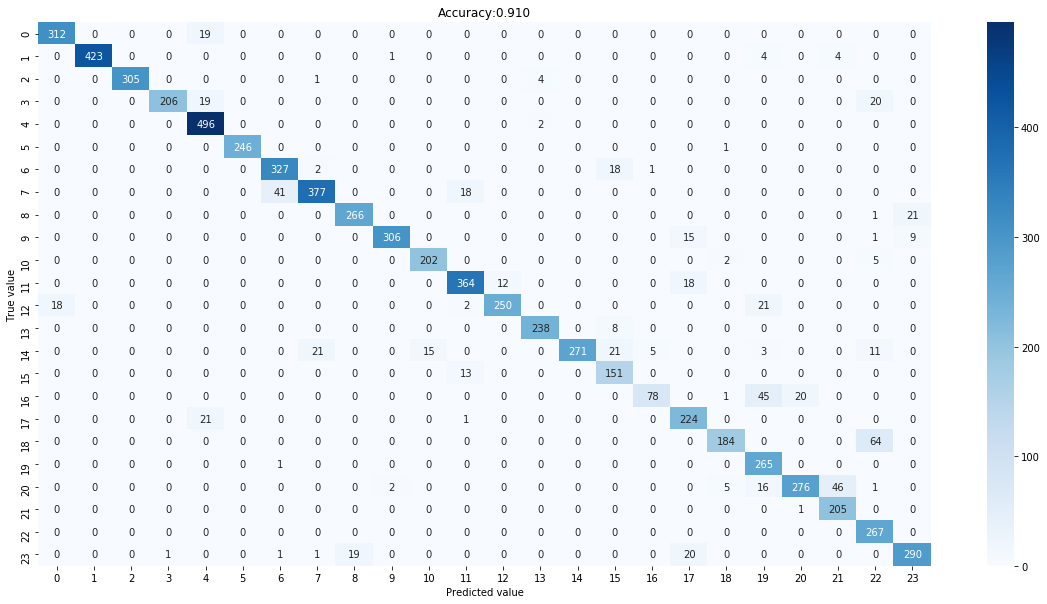

Test acc: 0.910345789180145


In [6]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import cv2
import keras
import numpy as np
from sklearn.metrics import  confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

model = keras.models.load_model("modelo.h5")

# Paso el one hot encoding a integer
labels = np.where(letras_test_Y==1)[1]

# Hago el predict en el conjunto de test
pred = model.predict(letras_test_X, verbose=1)

#pred = np.round(pred)
pred = np.argmax(pred, axis=1)

#Ahora puedo hacer la matriz de confusion
cm = confusion_matrix(labels, pred)

cm_sn = pd.DataFrame(cm)

plt.figure(figsize=(20,10))
sns.heatmap(cm_sn, annot=True, cmap='Blues', fmt='g')
plt.title('Accuracy:{0:.3f}'.format(accuracy_score(labels, pred)))
plt.ylabel('True value')
plt.xlabel('Predicted value')
plt.show()
print("Test acc: " + str(accuracy_score(labels, pred)))